In [1]:
import sys
sys.path.insert(0,'../src/')
from curve import *
from utils import *
from multiply_connected_pipe import *
import pickle
from matplotlib import pyplot as plt


with open('global_pipe_with_geometry.pickle','rb') as f:
    pipe = pickle.load(f)

In [2]:
# fig, axes = plt.subplots(32,1,figsize=(10,100))

# for ax,b in zip(axes,pipe.boundaries):
#     ax.set_aspect('equal')
#     a = np.concatenate([c.a + 2*i for i,c in enumerate(b.curves)])
#     ax.scatter(b.t.real, b.t.imag, c=a, s=0.1)
    

In [3]:
with open('pipes_and_shifts_built.pickle','rb') as f:
    pipes = pickle.load(f)
    pipes = [p for p,s in pipes]
    pipes = {len(p.t):p for p in pipes}
    pipes = list(pipes.values())
    

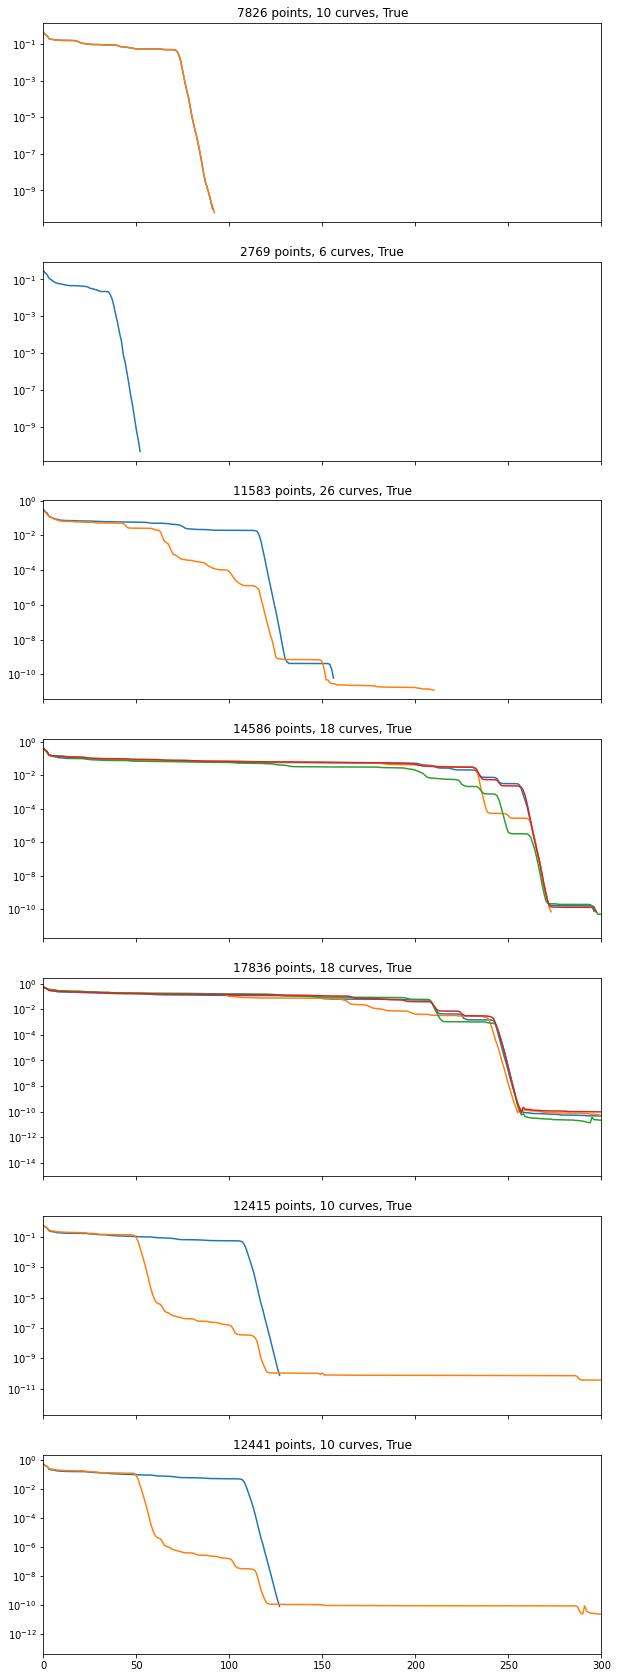

In [4]:
fig,axes = plt.subplots(7,1,figsize=(10,30),sharex=True)
fig.set_facecolor('white')

for ax,pipe in zip(axes,pipes):
    n_pts = len(pipe.t)
    n_curves = len([c for c in pipe.curves if not isinstance(c,Line)])
    
    ax.set_title(f'{n_pts} points, {n_curves} curves, {pipe.n_boundaries == 1}')
    ax.set_xlim(0,300)
    ax.set_facecolor('white')
    for callback in pipe.callbacks:
        ax.semilogy(callback.residuals)